In [1]:
import pandas as pd
import xarray as xr
from metab_model import calc_DO

In [2]:
df = pd.read_feather("1a_lstm_metab_just_metab/nstates_10/nep_100/rep_0/val_preds.feather")

In [3]:
df_2015 = df.set_index('date').loc['2015']
df_2015 = df_2015[df_2015.site_id == '01480617']

In [4]:
ds_inputs = xr.open_zarr("../well_obs_inputs.zarr/")

In [5]:
light = ds_inputs.sel(site_id = '01480617', date=slice('2015-01-01', '2015-09-30')).light_ratio.to_dataframe()

In [6]:
elev = ds_inputs.sel(site_id = '01480617', date=slice('2015-01-01', '2015-09-30')).hru_elev.values

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

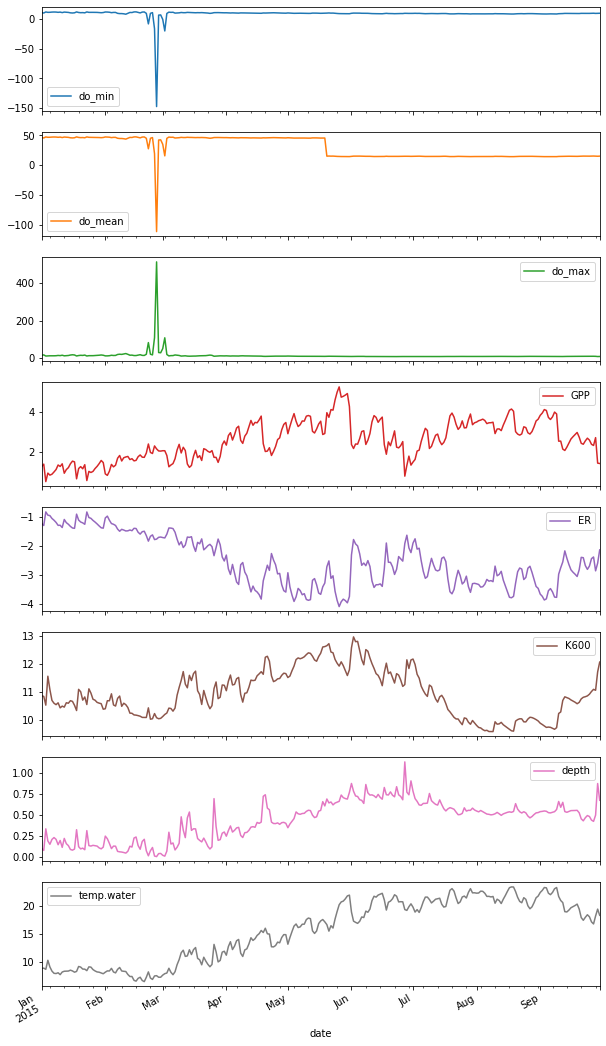

In [7]:
df_2015[df_2015.site_id == '01480617'].plot(subplots=True, figsize=(10, 20))

In [8]:
l = [df_2015.GPP, df_2015.ER, df_2015.K600, df_2015.depth, df_2015['temp.water'], elev, light.light_ratio]

In [9]:
for a in l:
    print(a.shape)

(273,)
(273,)
(273,)
(273,)
(273,)
(273,)
(273,)


In [21]:
date1 = '2015-02-26'

In [22]:
light.loc[date1]

site_id         01480617
light_ratio    0.0715232
Name: 2015-02-26 00:00:00, dtype: object

In [23]:
df_2015.loc[date1]

site_id         01480617
do_min          -146.923
do_mean         -110.384
do_max           515.135
GPP              2.13175
ER              -1.75424
K600             10.0953
depth         0.00143573
temp.water        7.5445
Name: 2015-02-26 00:00:00, dtype: object

In [10]:
do_min, do_max, k2, do_sat = calc_DO(df_2015.GPP, df_2015.ER, df_2015.K600, df_2015.depth, df_2015['temp.water'], elev, light.light_ratio)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

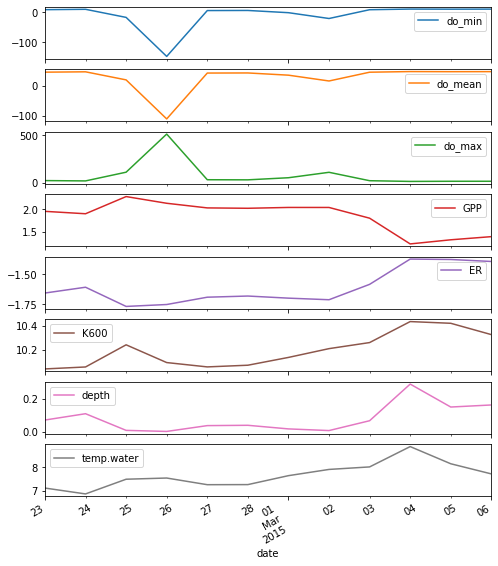

In [34]:
df_2015.loc['2015-02-23': '2015-03-06'].plot(subplots=True, figsize=(8, 10))

<AxesSubplot:xlabel='date'>

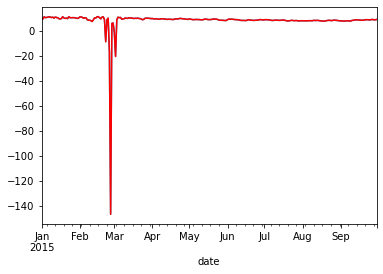

In [11]:
ax = do_min.plot()
df_2015.do_min.plot(ax=ax, c='r')

<AxesSubplot:xlabel='date'>

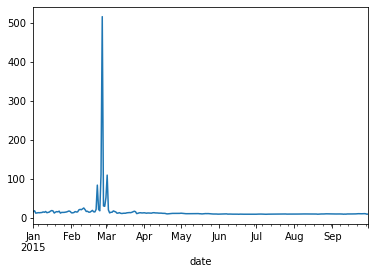

In [12]:
do_max.plot()

<AxesSubplot:label='da7aae69-bd0d-4756-9525-5fea817a2b2a'>

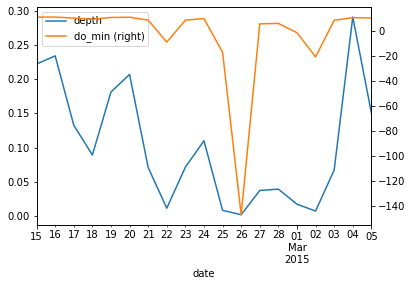

In [44]:
ax = df_2015.loc['2015-02-15': '2015-03-05'][['depth']].plot()
df_2015.loc['2015-02-15': '2015-03-05'][['do_min']].plot(secondary_y=True, ax=ax)

<AxesSubplot:xlabel='date'>

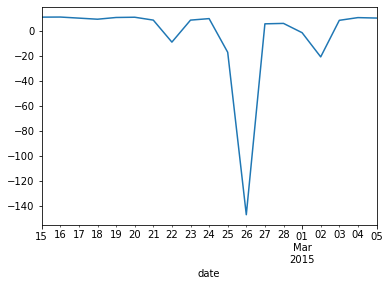

In [40]:
df_2015.do_min.loc['2015-02-15': '2015-03-05'].plot()

In [35]:
k2.sort_values().head(10)

date
2015-02-26    0.011054
2015-03-02    0.053099
2015-02-25    0.061659
2015-02-22    0.089604
2015-03-01    0.130933
2015-02-27    0.281845
2015-02-28    0.297092
2015-02-11    0.353780
2015-02-10    0.413814
2015-02-09    0.455590
dtype: float64

<AxesSubplot:xlabel='date'>

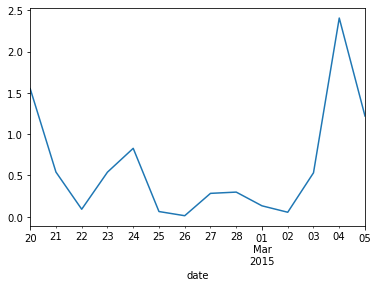

In [37]:
k2.loc['2015-02-20': '2015-03-05'].plot()

<AxesSubplot:xlabel='date'>

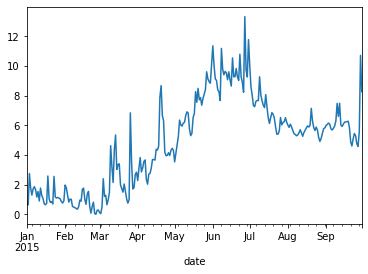

In [13]:
k2.plot()

<AxesSubplot:xlabel='date'>

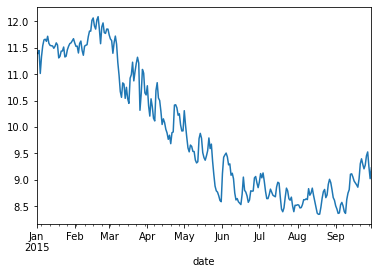

In [14]:
do_sat.plot()